# Import Libraries

In [3]:
# For Data Cleaning
import pandas as pd
import numpy as np
# For Data visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Summarizing reviews
import google.generativeai as palm
import config
# For creating network graphs
import networkx as nx

# Import Data

In [4]:
df = pd.read_csv(r"C:\Users\admin\Desktop\AI ML\sentiment A\british-airways-nlp\British_Airway_Review.csv")

In [5]:
df.head(2)

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,✅ Trip Verified | I had the most fantastic BA...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,✅ Trip Verified | Couldn’t book in online. Ar...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure


In [6]:
df.shape

(2500, 8)

# Data Preprocessing

In [7]:
df.dtypes

reviews              object
date                 object
country              object
seat_type            object
recommended          object
stars                 int64
route                object
type_of_traveller    object
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['year'] = df['date'].dt.year

In [10]:
df.drop(columns='date',
       inplace = True)

In [11]:
df.head()

,reviews,country,seat_type,recommended,stars,route,type_of_traveller,year
0,✅ Trip Verified | I had the most fantastic BA...,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure,2023
1,✅ Trip Verified | Couldn’t book in online. Ar...,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure,2023
2,✅ Trip Verified | London Heathrow to Mumbai in...,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure,2023
3,"✅ Trip Verified | Keflavík, Iceland to London ...",Iceland,Business Class,yes,5,London to Luanda,Couple Leisure,2023
4,✅ Trip Verified | Terrible Experience with Bri...,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure,2023


In [12]:
# Creating an id column for easier analysis
df['id'] = [i for i in range(len(df))]

In [13]:
df = df[['id','reviews','year','country','seat_type','recommended','stars','route','type_of_traveller']].copy()

In [14]:
df.duplicated().any()

False

In [15]:
df.sample()

,id,reviews,year,country,seat_type,recommended,stars,route,type_of_traveller
66,66,✅ Trip Verified |. The BA first lounge at Term...,2023,United Kingdom,Business Class,no,5,London to Tampa,Couple Leisure


In [16]:
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified', '')
df['reviews'] = df['reviews'].str.replace('|', '')
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_21008\4061082244.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews'] = df['reviews'].str.replace('|', '')


,id,reviews,year,country,seat_type,recommended,stars,route,type_of_traveller
0,0,I had the most fantastic BA Flight today. T...,2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,1,Couldn’t book in online. Arrived at check i...,2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,2,London Heathrow to Mumbai in a Boeing 787-8 ...,2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,3,"Keflavík, Iceland to London Heathrow on an A...",2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,4,Terrible Experience with British Airways. I ...,2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


In [17]:
df.year.unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015], dtype=int64)

In [18]:
df.stars.unique()

array([5, 3, 1, 9, 7], dtype=int64)

In [19]:
df.country.unique()

array(['Hong Kong', 'United Kingdom', 'Iceland', 'Canada', 'Qatar',
       'Spain', 'Germany', 'United States', 'South Africa', 'Greece',
       'Italy', 'Senegal', 'United Arab Emirates', 'Romania', 'Australia',
       'Cyprus', 'Chile', 'Sweden', 'Ireland', 'Netherlands', 'Austria',
       'France', 'India', 'Belgium', 'New Zealand', 'Czech Republic',
       'Malaysia', 'Singapore', 'Ghana', 'Switzerland', 'Bermuda',
       'Botswana', 'Brazil', 'Panama', 'Nigeria', 'Russian Federation',
       'Philippines', 'Bulgaria', 'Poland', 'Thailand', 'Argentina',
       'Mexico', 'Denmark', 'Saint Kitts and Nevis', 'Vietnam', 'Norway',
       'Jordan', 'Japan', 'Taiwan', 'China', 'Slovakia', 'Kuwait',
       'Israel', 'South Korea', 'Saudi Arabia', 'Hungary', 'Portugal',
       'Cayman Islands', 'Costa Rica', 'Egypt', 'Laos', 'Turkey',
       'Indonesia', 'Bahrain', 'Dominican Republic', 'Luxembourg',
       'Finland'], dtype=object)

In [20]:
df.seat_type.unique()

array(['Business Class', 'Economy Class', 'Premium Economy',
       'First Class'], dtype=object)

In [21]:
df.recommended.unique()

array(['yes', 'no'], dtype=object)

In [22]:
df.route.unique()

array(['Heathrow to Las Vegas', 'Rome to Heathrow', 'Gatwick to Venice',
       'London to Luanda', 'Denver to Heathrow', 'BKK to LHR',
       'London to Tampa', 'London to Sydney', 'LHR to CPT', 'BLR to LHR'],
      dtype=object)

In [23]:
df.type_of_traveller.unique()

array(['Family Leisure', 'Solo Leisure', 'Couple Leisure', 'Business'],
      dtype=object)

In [24]:
df.head()

,id,reviews,year,country,seat_type,recommended,stars,route,type_of_traveller
0,0,I had the most fantastic BA Flight today. T...,2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,1,Couldn’t book in online. Arrived at check i...,2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,2,London Heathrow to Mumbai in a Boeing 787-8 ...,2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,3,"Keflavík, Iceland to London Heathrow on an A...",2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,4,Terrible Experience with British Airways. I ...,2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


# Visualizing the routes

In [25]:
node_list = ['Heathrow',
             'Las Vegas',
             'Rome',
             'Gatwick',
             'Venice',
             'London',
             'Ludana',
             'Denver',
             'BKK',
             'LHR',
             'Tampa',
             'Sydney',
             'CPT',
             'BLR']

edge_list = [('Heathrow','Las Vegas'), ('Rome' , 'Heathrow'), 
             ('Gatwick', 'Venice'),('London','Luanda'), 
             ('Denver','Heathrow'), ('BKK' , 'LHR'),
             ('London', 'Tampa'), ('London' ,'Sydney'), 
             ('LHR', 'CPT'), ('BLR','LHR')]

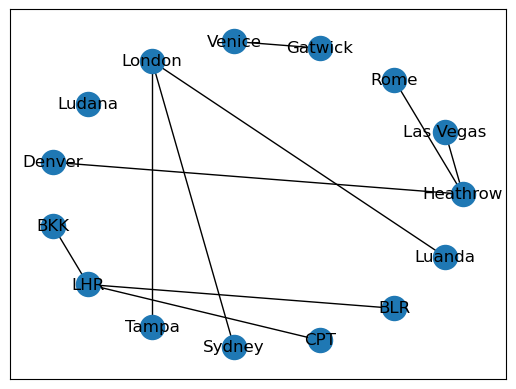

In [26]:
G_route = nx.Graph()
G_route.add_nodes_from(node_list)
G_route.add_edges_from(edge_list)
pos = nx.circular_layout(G_route)
nx.draw_networkx(G_route, pos=pos, with_labels = True)

In [27]:
route_count = df.groupby('route')['id'].sum().reset_index()
route_count.style.background_gradient(cmap='Blues')

,route,id
0,BKK to LHR,312500
1,BLR to LHR,313500
2,Denver to Heathrow,312250
3,Gatwick to Venice,311750
4,Heathrow to Las Vegas,311250
5,LHR to CPT,313250
6,London to Luanda,312000
7,London to Sydney,313000
8,London to Tampa,312750
9,Rome to Heathrow,311500


# Data Visualization

## 1. Top 10 countries having most reviews

In [25]:
country_count = df.groupby('country')['id'].sum().reset_index().sort_values('id', ascending = False)[:10]
country_count

,country,id
64,United Kingdom,2022202
65,United States,307688
9,Canada,98805
1,Australia,90544
21,Germany,72540
59,Switzerland,39081
55,South Africa,28352
12,China,28310
39,Netherlands,28117
20,France,27969


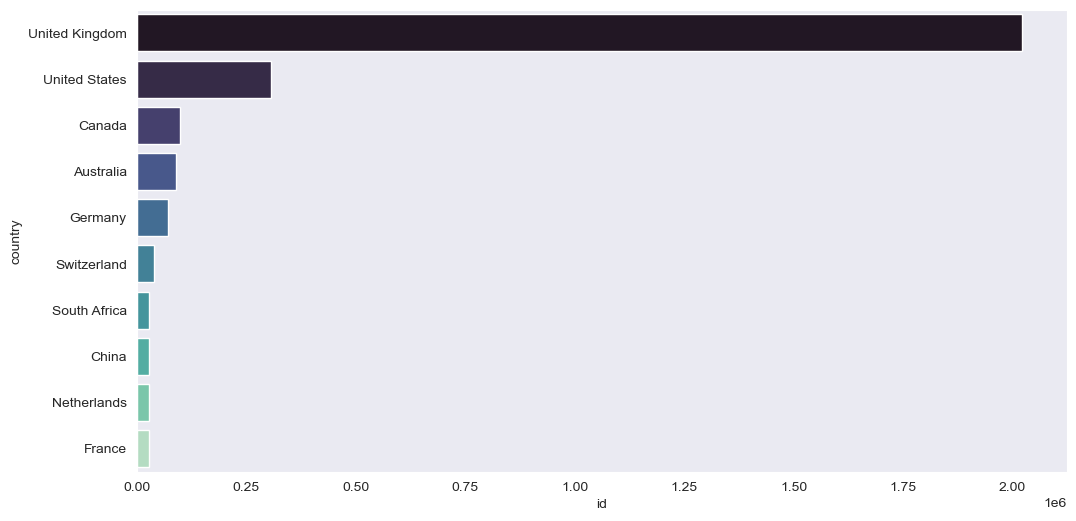

In [26]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
country_bar = sns.barplot(data = country_count, x = 'id', y = 'country', orient = 'h', palette = "mako")

## 2. Number of reviews per year

In [27]:
year_id = df.groupby('year')['id'].sum().reset_index()
year_id

,year,id
0,2015,256935
1,2016,1202415
2,2017,880022
3,2018,353322
4,2019,267178
5,2020,54132
6,2021,36975
7,2022,58575
8,2023,14196


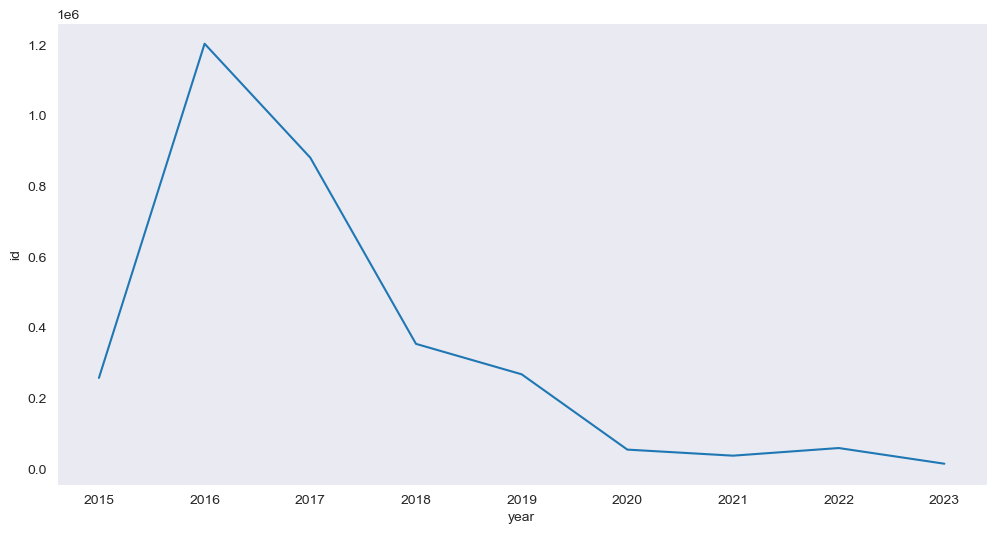

In [28]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
year_line = sns.lineplot(data = year_id, x = 'year', y = 'id')

## 3. Types of travellers and Seats distribution

In [29]:
traveller = df.groupby('type_of_traveller')['id'].sum().reset_index()
traveller

,type_of_traveller,id
0,Business,626000
1,Couple Leisure,1251000
2,Family Leisure,623500
3,Solo Leisure,623250


In [30]:
seat = df.groupby('seat_type')['id'].sum().reset_index()
seat

,seat_type,id
0,Business Class,904224
1,Economy Class,1671650
2,First Class,214938
3,Premium Economy,332938


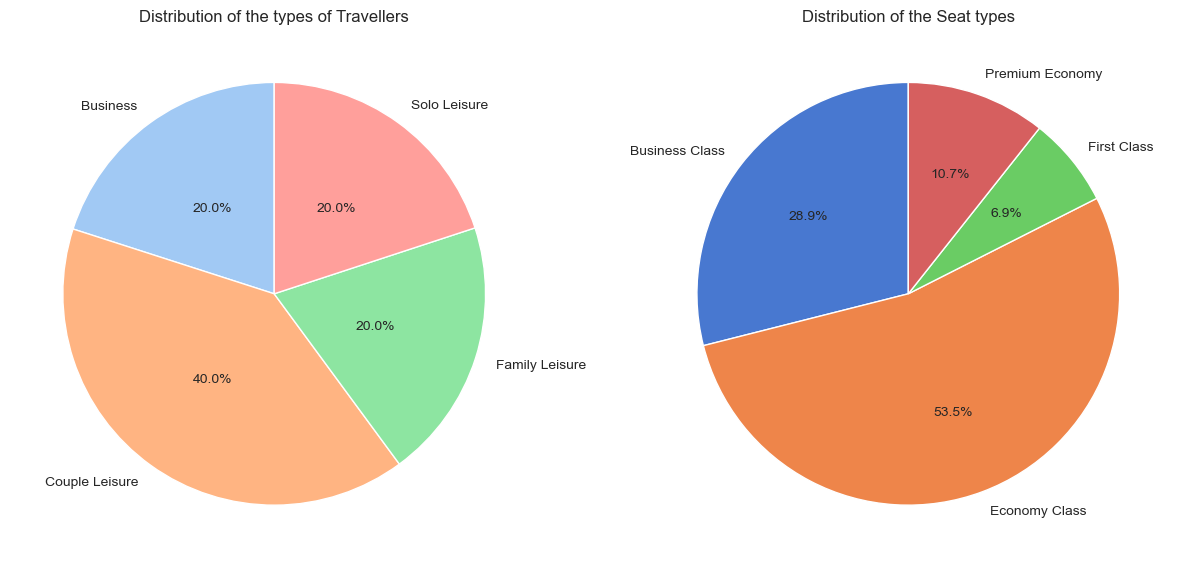

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,10))
color2 = sns.color_palette('pastel')
ax1.pie(data = traveller, x = 'id', labels = 'type_of_traveller', startangle=90, colors = color2, 
        autopct = "%1.1f%%", pctdistance = 0.5,labeldistance = 1.1)
ax1.set_title("Distribution of the types of Travellers")

color3 = sns.color_palette("muted")
ax2.pie(data = seat, x = 'id', labels = 'seat_type', startangle=90,
        colors = color3, autopct = "%1.1f%%")
ax2.set_title("Distribution of the Seat types")

plt.show()

## 4. Distribution of the Recommendation of the British Airways

In [32]:
recom = df.groupby('recommended')['id'].sum().reset_index()
recom

,recommended,id
0,no,1949197
1,yes,1174553


Text(0.5, 1.0, 'Distribution of the Recommendation of the British Airways')

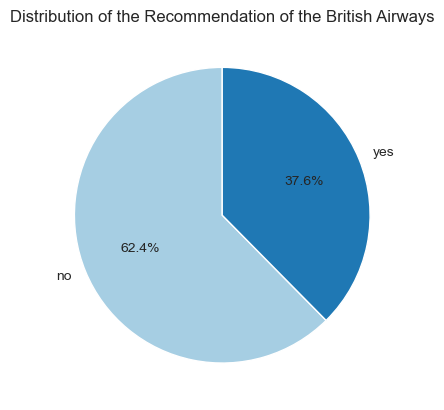

In [34]:
color4 = sns.color_palette("Paired")
plt.pie(data = recom, x = 'id', labels = 'recommended', startangle=90, autopct = "%1.1f%%", colors = color4)
plt.title("Distribution of the Recommendation of the British Airways") 

## 5. Rating distribution

In [36]:
star_count = df.groupby('stars')['id'].sum().reset_index()
star_count

,stars,id
0,1,283750
1,3,1421250
2,5,850569
3,7,284204
4,9,283977


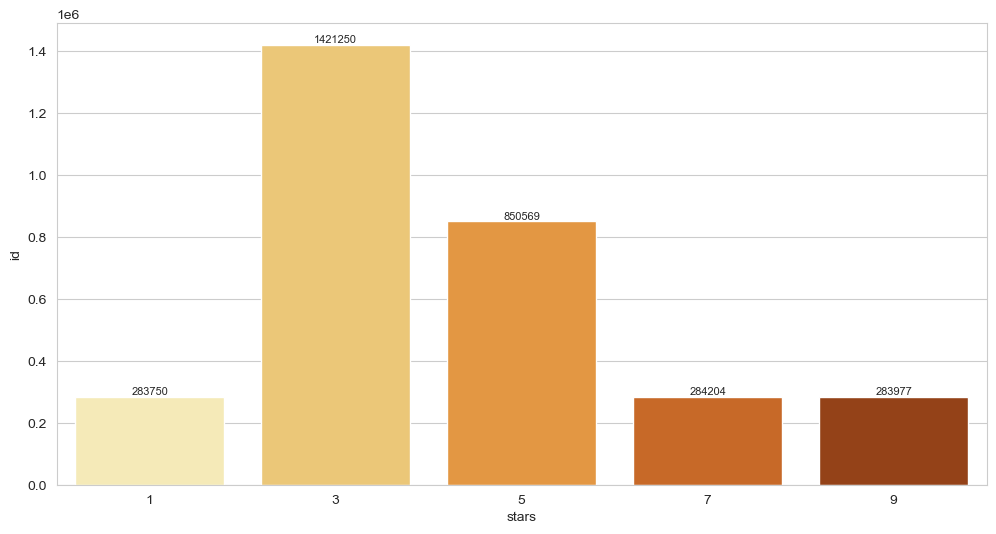

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(data = star_count, x = 'stars', y = 'id', palette = "YlOrBr")
for i, count in enumerate(star_count['id']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)

## 6. Recommendation of the airlines distribution by type of travellers and seat types 

Text(0.5, 1.0, 'Distribution of recommendations by seat type')

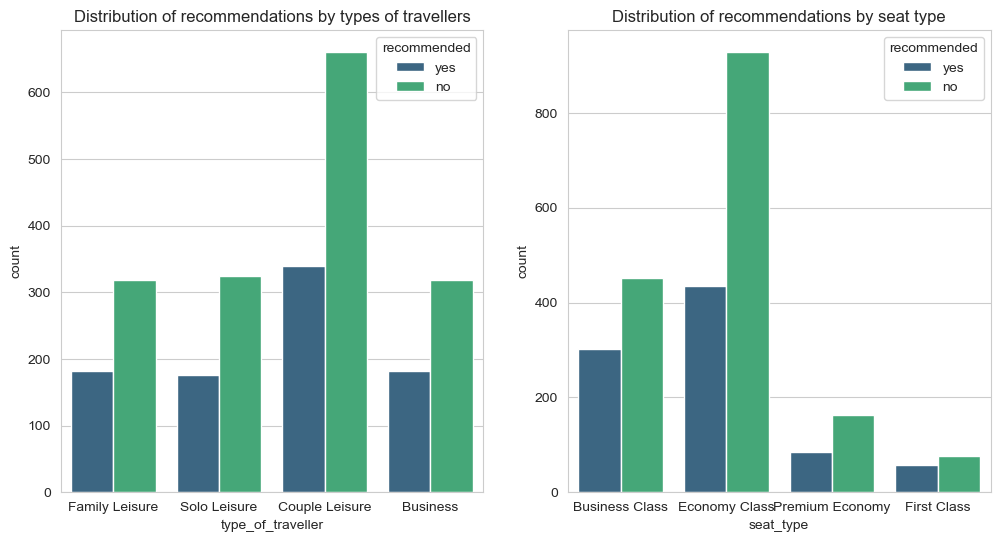

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(x = df['type_of_traveller'] , hue = df['recommended'], ax = ax1, palette = 'viridis')
ax1.set_title("Distribution of recommendations by types of travellers")
sns.countplot(x = df['seat_type'] , hue = df['recommended'], ax = ax2, palette = 'viridis')
ax2.set_title("Distribution of recommendations by seat type")

# Summarizing the Reviews using PaLM 2

In [40]:
neg_df = df[df['recommended'] =='no']
pos_df = df[df['recommended'] == 'yes']

In [50]:
import google.generativeai as genai

genai.configure(api_key=config.API_KEY)

defaults = {
  'model': 'models/text-bison-001',
  'temperature': 0.5,
  'candidate_count': 1,
  'top_k': 40,
  'top_p': 0.95,
  'max_output_tokens': 3000,
}
prompt = """
I have the British airways dataset called df which contains a column called reviews. 
I have created two sub datasets based on whether customers recommend the airlines or not namely pos_df, neg_df.
Generate two summaries, one summary for reviews in pos_df dataset and another summary for neg_df.
The summaries should be in paragraphs.
Explain what passangers like and dislike about British Airways. Explain in detail why passangers won't recommend the airlines.
Explain why the passangers had a bad experience.
"""

response = genai.generate_text(
  **defaults,
  prompt=prompt
)
print(response.result)

**Passengers like British Airways for:**

* **The friendly and helpful staff.** Passengers appreciate the way that British Airways staff go out of their way to make sure that they have a pleasant experience. They are always willing to help with any questions or concerns, and they make sure that passengers are comfortable and relaxed.
* **The comfortable seats and amenities.** British Airways offers a comfortable and luxurious flying experience. The seats are spacious and have plenty of legroom, and the amenities are top-notch. Passengers appreciate the complimentary food and drinks, the Wi-Fi, and the entertainment options.
* **The reliable service.** British Airways is a reliable airline that gets passengers to their destinations on time. Passengers appreciate the fact that they can count on British Airways to get them where they need to go.

**Passengers dislike British Airways for:**

* **The high prices.** British Airways is a more expensive airline than some of its competitors. Pa